# Chapter 25: Algorithms and data structures

## Bubblesort

In [2]:
def bubblesort(nums):
    
    numls = list()
    for num in nums:
        numls.append(num)
    
    for i in range(len(numls)):
        for j in range(len(numls)-1):
            left = numls[j]
            right = numls[j+1]
            if left > right:
                numls[j+1] = left
                numls[j] = right
    
    return(numls)

In [3]:
bubblesort([3,4,5,1,6,7,1,9])

[1, 1, 3, 4, 5, 6, 7, 9]

##### Calculate the time

In [12]:
import timeit

In [6]:
start = timeit.default_timer()
bubblesort([3,4,5,1,6,7,1,9])
end = timeit.default_timer()

print(end-start)

0.000180353999894578


##### What about a prolonged list

In [6]:
import random

ls = [random.randint(1,100) for i in range(1000)]

In [13]:
start = timeit.default_timer()
bubblesort(ls)
end = timeit.default_timer()

print(end-start)

0.11913587700109929


##### Try plotting a graph

In [14]:
def bubbletime(ls):
    start = timeit.default_timer()
    bubblesort(ls)
    end = timeit.default_timer()
    return(end-start)

In [18]:
ls_time = list()
ls_time_x = list(range(1,1000,5))

for r in range(1,1000,5):
    ls = [random.randint(1,100) for i in range(r)]
    ls_time.append(bubbletime(ls))

In [14]:
import matplotlib.pyplot as plt

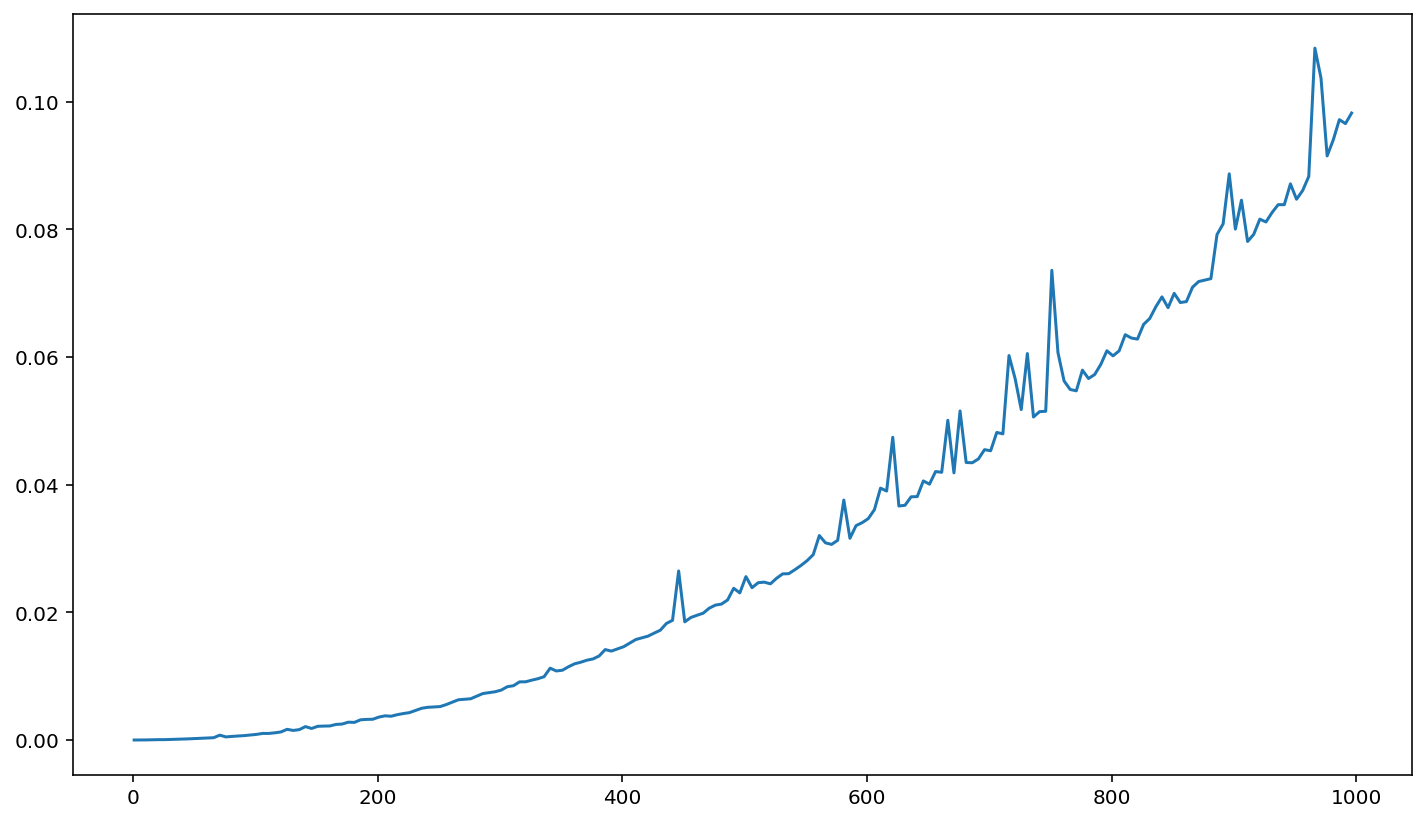

In [20]:
plt.plot(ls_time_x, ls_time)

## Linked list

In [22]:
class LinkedList:
    
    def __init__(self):
        self.first_n = None
        
    def get_smallest(self):
        if self.first_n != None:
            return self.first_n.item
        
    def insert_item(self, item):
        if self.first_n == None:
            newnode = Node(item)
            self.first_n = newnode
        else:
            
            # 1 pass the first node to the next (second) node, as now item being the first node
            if item < self.first_n.item:
                newnode = Node(item)
                newnode.next_n = self.first_n
                self.first_n = newnode
            
            # 2 when item larger than first node; need to decide the position of item
            else:
                self.first_n.insert_item(item) # this could be repetitive

In [24]:
class Node:
    
    def __init__(self, item):
        self.item = item
        self.next_n = None
        
    def insert_item(self, item):
        
        # 3 if no next node (no node larger than self node)
        if self.next_n == None:
            newnode = Node(item)
            self.next_n = newnode

        # 4 like back to 1 and 2
        else:

            # 5 like # 1
            if item < self.next_n.item:
                newnode = Node(item)
                newnode.next_n = self.next_n
                self.next_n = newnode
            
            # 6 repeat all over again
            else:
                self.next_n.insert_item(item)

In [28]:
numls = LinkedList()
numls.insert_item(8)
numls.insert_item(4)
numls.insert_item(7)
numls.get_smallest()

4

##### Getting all the nodes

In [30]:
node = numls.first_n
itemls = list()
itemls.append(node.item)

while node.next_n != None:
    newnode = node.next_n
    itemls.append(newnode.item)
    node = newnode

In [31]:
print(itemls)

[4, 7, 8]


##### incorporating the above function into the class LinkedList

In [55]:
class LinkedList:
    
    def __init__(self):
        self.first_n = None
        
    def get_smallest(self):
        if self.first_n != None:
            return self.first_n.item
        
    def insert_item(self, item):
        if self.first_n == None:
            newnode = Node(item)
            self.first_n = newnode
        else:
            
            # 1 pass the first node to the next (second) node, as now item being the first node
            if item < self.first_n.item:
                newnode = Node(item)
                newnode.next_n = self.first_n
                self.first_n = newnode
            
            # 2 when item larger than first node; need to decide the position of item
            else:
                self.first_n.insert_item(item) # this could be repetitive
                           
    def get_all_nodes(self):
        
        if self.first_n != None:
            
            node = self.first_n
            itemls = list()
            itemls.append(node.item)

            while node.next_n != None:
                newnode = node.next_n
                itemls.append(newnode.item)
                node = newnode
            
            return itemls
        
        else:
            print("No item in the list")

In [58]:
ls = [random.randint(1,100) for i in range(20)]
lkls = LinkedList()
for i in ls:
    lkls.insert_item(i)

lkls.get_all_nodes()

[2, 7, 8, 11, 13, 21, 29, 38, 49, 55, 57, 62, 63, 65, 74, 76, 79, 83, 92, 97]

##### compute time

In [59]:
def linkedlisttime(ls):
    start = timeit.default_timer()
    lkls = LinkedList()
    for i in range(len(ls)):
        lkls.insert_item(ls[i])
    lkls.get_smallest()
    end = timeit.default_timer()
    return(end-start)

In [60]:
ls_time = list()
ls_time_x = list(range(1,1000,5))

for r in range(1,1000,5):
    ls = [random.randint(1,100) for i in range(r)]
    ls_time.append(linkedlisttime(ls))

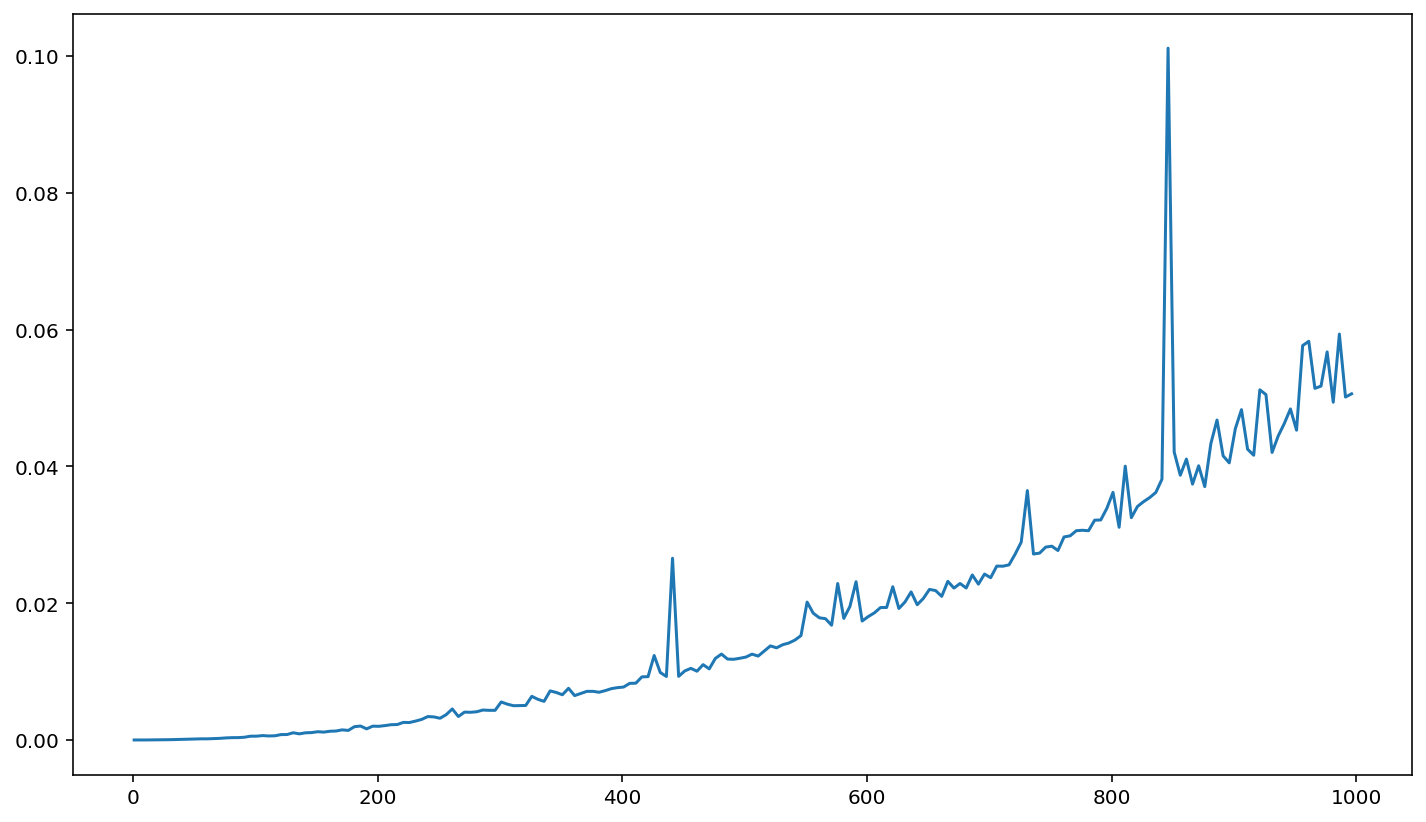

In [61]:
plt.plot(ls_time_x, ls_time) # seems faster than the bubblesort

## The Binary Tree

In [112]:
class BinaryTree:
    
    def __init__(self):
        self.root_n = None
        
    def insert_item(self, item):
        
        if self.root_n == None:
            newnode = Node(item)
            self.root_n = newnode
            
        else:
            self.root_n.insert_item(item)
            
    def get_smallest(self):
        
        if self.root_n != None:
            
            node = self.root_n
            
            while node.left_n != None:
                newnode = node.left_n
                node = newnode
                
            return(node.item)
    
    def get_largest(self):
        
        if self.root_n != None:
            
            node = self.root_n
            
            while node.right_n != None:
                newnode = node.right_n
                node = newnode
                
            return(node.item)
            
    def get_all_nodes(self):
        
        if self.root_n != None:
            
            node = self.root_n
            itemlsR = list()
            itemlsL = list()
            itemlsL.append(node.item)
            itemlsR.append(node.item)

            while node.right_n != None:
                newnode = node.right_n
                itemlsR.append(newnode.item)
                node = newnode
            
            while node.left_n != None:
                newnode = node.left_n
                itemlsL.append(newnode.item)
                node = newnode
            
            itemls = [itemlsL[len(itemlsL)-i-1] for i in range(len(itemlsL))] + itemlsR[1:]
            
            return itemls
        
        else:
            print("No item in the list")

In [126]:
class Node:
    
    def __init__(self, item):
        self.item = item
        self.right_n = None
        self.left_n = None
        
    def insert_item(self, item):
        
        # if the inserted item is larger than the current node
        if item > self.item:
            if self.right_n == None:
                newnode = Node(item)
                self.right_n = newnode
            else:
                
                # if the new node is between the root and right node
                if item < self.right_n.item:
                    newnode = Node(item)
                    newnode.right_n = self.right_n
                    self.right_n = newnode
                    
                # if the new node is larger than the right node
                else:
                    self.right_n.insert_item(item)
        
        # if the inserted item is smaller than the current node
        if item < self.item:
            if self.left_n == None:
                newnode = Node(item)
                self.left_n = newnode
            else:
                if item > self.left_n.item:
                    newnode = Node(item)
                    newnode.left_n = self.left_n
                    self.left_n = newnode
                else:
                    self.left_n.insert_item(item)

In [127]:
bt = BinaryTree()
bt.insert_item(9)
bt.insert_item(4)
bt.insert_item(8)
bt.get_smallest()

4

In [128]:
bt.get_largest()

9

In [129]:
bt.get_all_nodes()

[4, 8, 9]

##### Compute time

In [130]:
def binarytreetime(ls):
    start = timeit.default_timer()
    btls = BinaryTree()
    for i in range(len(ls)):
        btls.insert_item(ls[i])
    btls.get_smallest()
    end = timeit.default_timer()
    return(end-start)

In [133]:
ls_time = list()
ls_time_x = list(range(1,1000,5))

for r in range(1,1000,5):
    ls = [random.randint(1,100) for i in range(r)]
    ls_time.append(binarytreetime(ls))

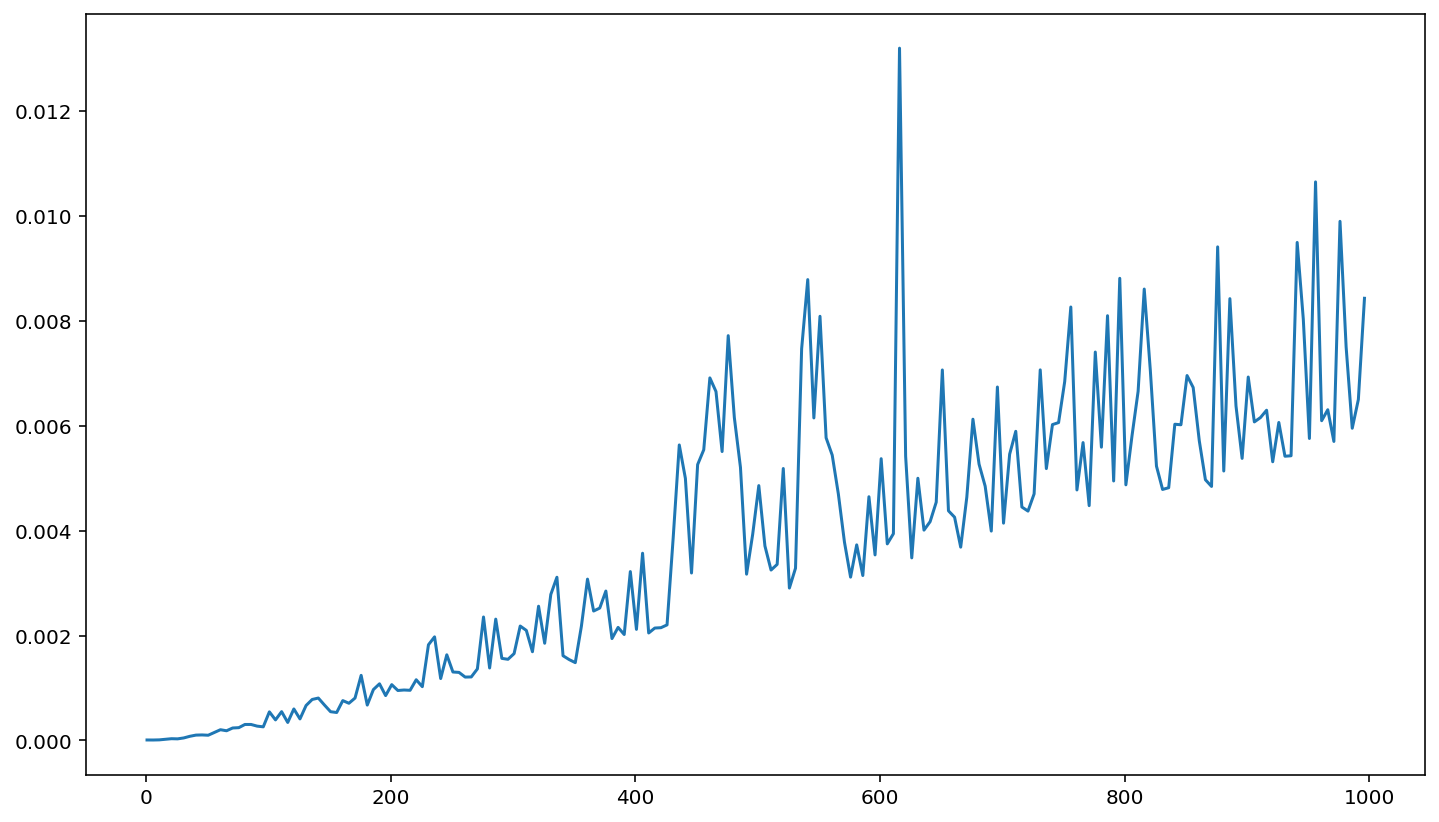

In [134]:
plt.plot(ls_time_x, ls_time) # much faster!

## QuickSort using recursive loops

In [2]:
def quicksort(ls):
    
    if len(ls) <= 1:
        
        return(ls)
    
    else:
        
        lt = list()
        gt = list()
        eq = list()
        pi = ls[0] # as a pivot
        
        # sorting the list of numbers into three bins
        for i in ls:
            if i < pi:
                lt.append(i)
            elif i == pi:
                eq.append(i)
            else:
                gt.append(i)
                
        
        # recursive loops if not all num equals to pivot
        lt_sorted = quicksort(lt)
        gt_sorted = quicksort(gt)
        
        answer = [i for i in lt_sorted] + [i for i in eq] + [i for i in gt_sorted]
        return answer

In [8]:
ls = [random.randint(1,100) for i in range(20)]
quicksort(ls)

[3, 7, 7, 11, 13, 19, 20, 26, 33, 37, 43, 67, 68, 71, 72, 72, 82, 84, 90, 94]

In [10]:
def quicksorttime(ls):
    start = timeit.default_timer()
    quicksort(ls)
    end = timeit.default_timer()
    return(end-start)

In [13]:
ls_time = list()
ls_time_x = list(range(1,1000,5))

for r in range(1,1000,5):
    ls = [random.randint(1,100) for i in range(r)]
    ls_time.append(quicksorttime(ls))

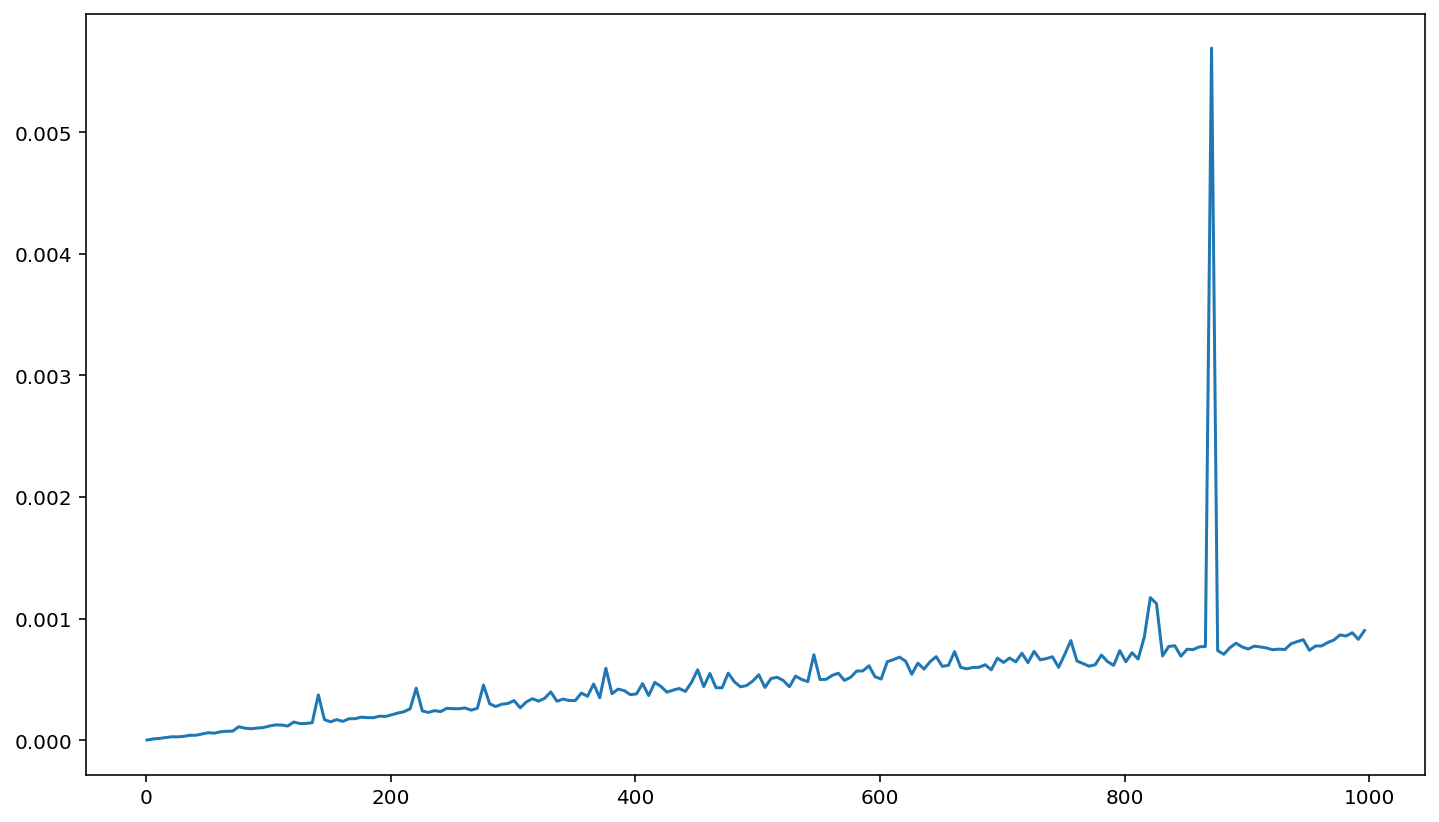

In [15]:
plt.plot(ls_time_x, ls_time) # ultrafast!

## MergeSort (Also Question 1 for the last session)

In [22]:
def merge(ls1, ls2):
    
    ls = list()
    n1 = 0
    n2 = 0
    
    while n1 < len(ls1) or n2 < len(ls2):
        if n1 == len(ls1):
            ls.append(ls2[n2])
            n2 += 1
        elif n2 == len(ls2):
            ls.append(ls1[n1])
            n1 += 1
        else:
            if ls1[n1] <= ls2[n2]:
                ls.append(ls1[n1])
                n1 += 1
            else:
                ls.append(ls2[n2])
                n2 += 1
        
    return ls

In [23]:
merge([1,2,3],[2,3,4])

[1, 2, 2, 3, 3, 4]

In [25]:
def mergesort(ls):
    
    # the most important line
    if len(ls) == 1:
        return(ls)
    
    # dividing the list
    ls1 = ls[:(len(ls)//2)]
    ls2 = ls[(len(ls)//2):]
    
    # recursive loop
    ls1_sorted = mergesort(ls1)
    ls2_sorted = mergesort(ls2)
    
    return(merge(ls1_sorted,ls2_sorted))

In [26]:
mergesort([1,54,3,236,7,5,3])

[1, 3, 3, 5, 7, 54, 236]

In [28]:
ls = [random.randint(1,100) for i in range(15)]
mergesort(ls)

[8, 9, 15, 35, 36, 39, 46, 48, 57, 57, 63, 76, 78, 80, 88]

##### Compute time

In [29]:
def mergesorttime(ls):
    start = timeit.default_timer()
    mergesort(ls)
    end = timeit.default_timer()
    return(end-start)

In [30]:
ls_time = list()
ls_time_x = list(range(1,1000,5))

for r in range(1,1000,5):
    ls = [random.randint(1,100) for i in range(r)]
    ls_time.append(mergesorttime(ls))

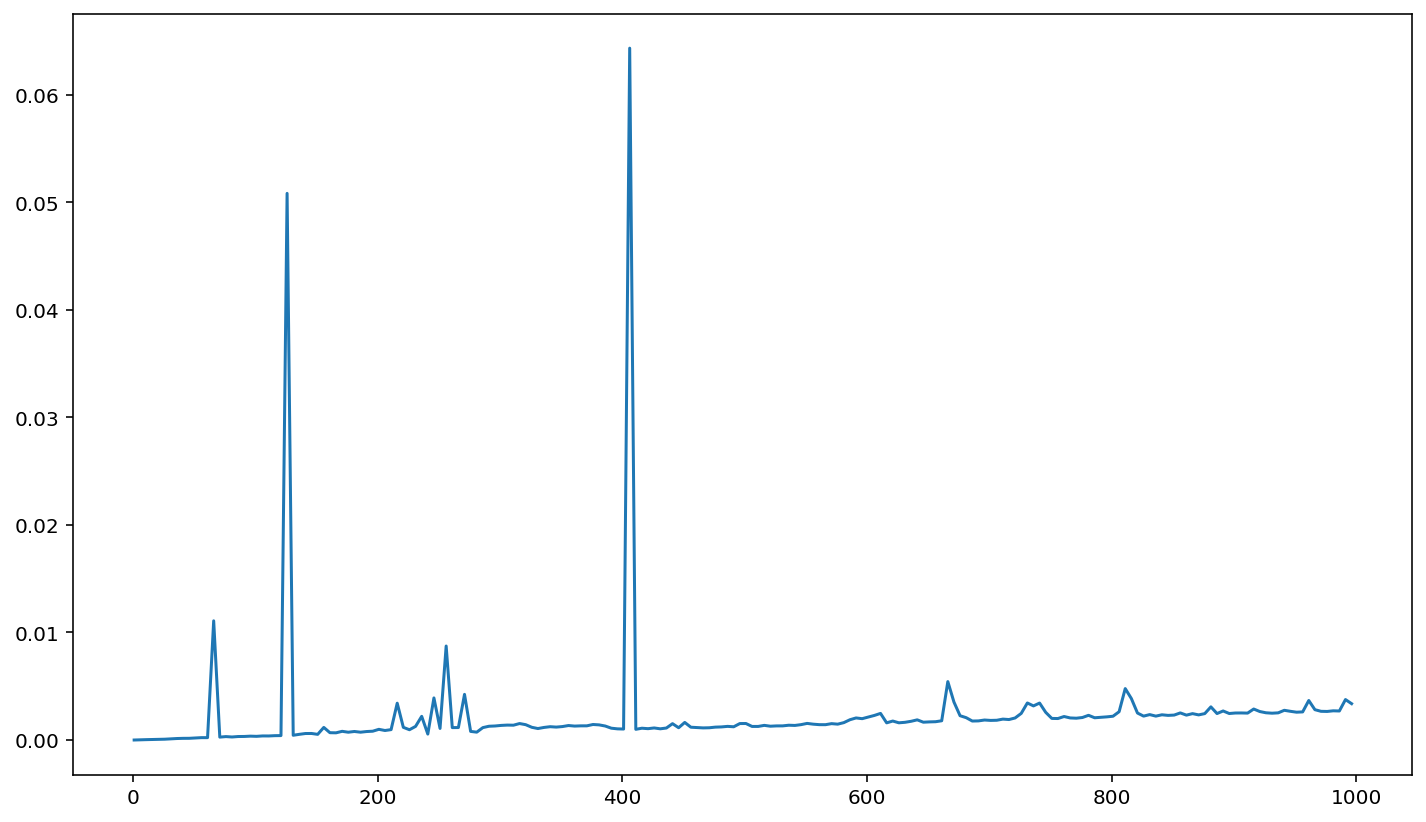

In [31]:
plt.plot(ls_time_x, ls_time) # faster and flatter

## Fibonacci numbers

In [9]:
def fibon(n):
    
    if n == 1 or n == 2:
        return(1)
    
    else:
        return(fibon(n-1) + fibon(n-2))

In [10]:
fibon(10)

55

In [10]:
ls_f = list()
for i in range(1,11,1):
    ls_f.append(fibon(i))

In [11]:
ls_f

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

##### using simple loops:

In [7]:
def fibon_loop(n):
    num = list()
    for i in range(n):
        if i <= 1:
            num.append(1)
        if i > 1:
            num.append(num[i-2]+num[i-1])
    return num[-1]

In [8]:
fibon_loop(10)

55

##### comparing the time used

In [11]:
import timeit

In [17]:
start = timeit.default_timer()
fibon(25)
end = timeit.default_timer()
end-start

0.015969811000104528

In [18]:
start = timeit.default_timer()
fibon_loop(25)
end = timeit.default_timer()
end-start

5.168399366084486e-05